# 1.展示如何获得元器件内部的参数

In [2]:
import os #引入操作系统模块

import matplotlib.pyplot as plt #绘图模块


import PySpice.Logging.Logging as Logging  
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *


class Level2(SubCircuitFactory):
    __name__ = 'level2'
    __nodes__ = ('d4', 'g4', 'v4') #三个节点：d4--漏极， g4--栅极，  v4--源极
    def __init__(self):
        super().__init__()
        self.M(1, 'd4', 'g4', 'v4', 'v4', model='nmos', w=1e-5, l=3.5e-7)

class Level1(SubCircuitFactory):
    __name__ = 'level1'
    __nodes__ = ('d3', 'g3', 'v3')
    def __init__(self):
        super().__init__()
        self.X('mos2', 'level2', 'd3', 'g3', 'v3')
        self.subcircuit(Level2())

circuit = Circuit('Transistor output characteristics')
circuit.V('dd', 'd1', circuit.gnd, 2)
circuit.V('ss', 'vsss', circuit.gnd, 0)
circuit.V('sig', 'g1', 'vsss', 0)
circuit.X('mos1', 'level1', 'd1', 'g1', 'vsss')

if True:
    circuit.subcircuit(Level1())
else:
    subcircuit_level2 = SubCircuit('level2', 'd4', 'g4', 'v4')
    subcircuit_level2.M(1, 'd4', 'g4', 'v4', 'v4', model='nmos', w=1e-5, l=3.5e-7)

    subcircuit_level1 = SubCircuit('level1', 'd3', 'g3', 'v3')
    subcircuit_level1.X('mos2', 'level2', 'd3', 'g3', 'v3')
    subcircuit_level1.subcircuit(subcircuit_level2)

    circuit.subcircuit(subcircuit_level1)

print(str(circuit))


simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vdd=slice(0, 5, .1)) # Fixme: ,Vsig=slice(1, 5, 1)

.title Transistor output characteristics
.subckt level1 d3 g3 v3
.subckt level2 d4 g4 v4
M1 d4 g4 v4 v4 nmos
.ends level2
Xmos2 d3 g3 v3 level2
.ends level1
Vdd d1 0 2
Vss vsss 0 0
Vsig g1 vsss 0
Xmos1 d1 g1 vsss level1

2018-05-29 14:12:38,915 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.INFO - New instance for id 0
2018-05-29 14:12:38,981 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Load C:\Program Files\Spice64\bin_dll\ngspice.dll
2018-05-29 14:12:39,092 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Note: can't find init file.
2018-05-29 14:12:39,122 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Execute command: version -f
2018-05-29 14:12:39,132 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Ngspice version 27 with extensions: CIDER, XSPICE
2018-05-29 14:12:39,132 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Execute command: set nomoremode
2018-05-29 14:12:39,132 - PySpice.Spice.NgSpice.Simula

# 2. Fast Fourier Transform

C:\Users\ldc\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\ldc\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


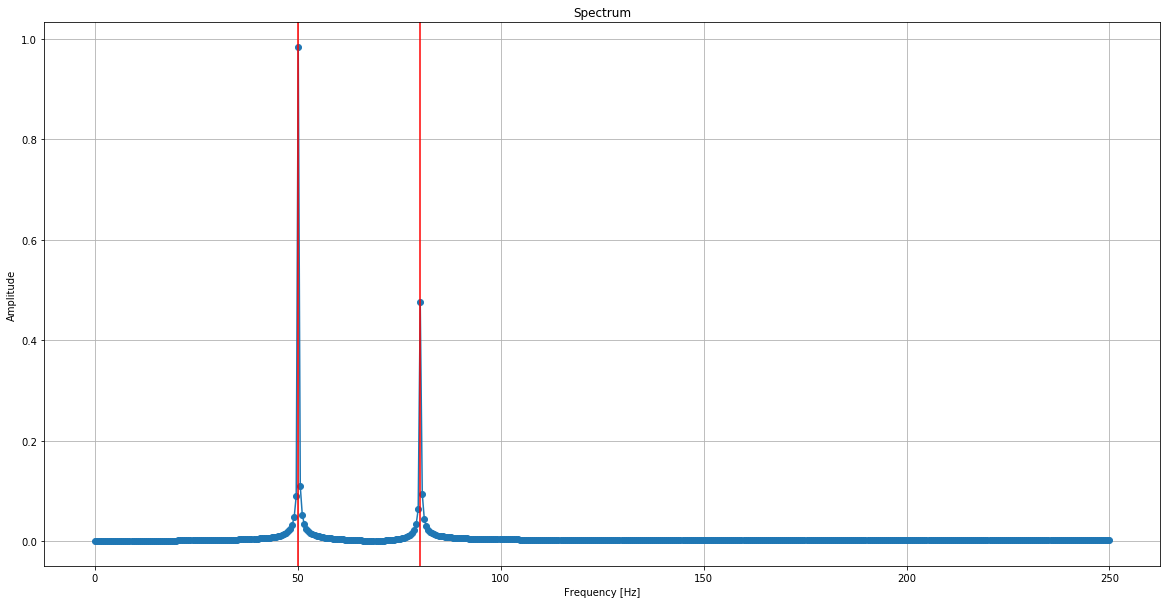

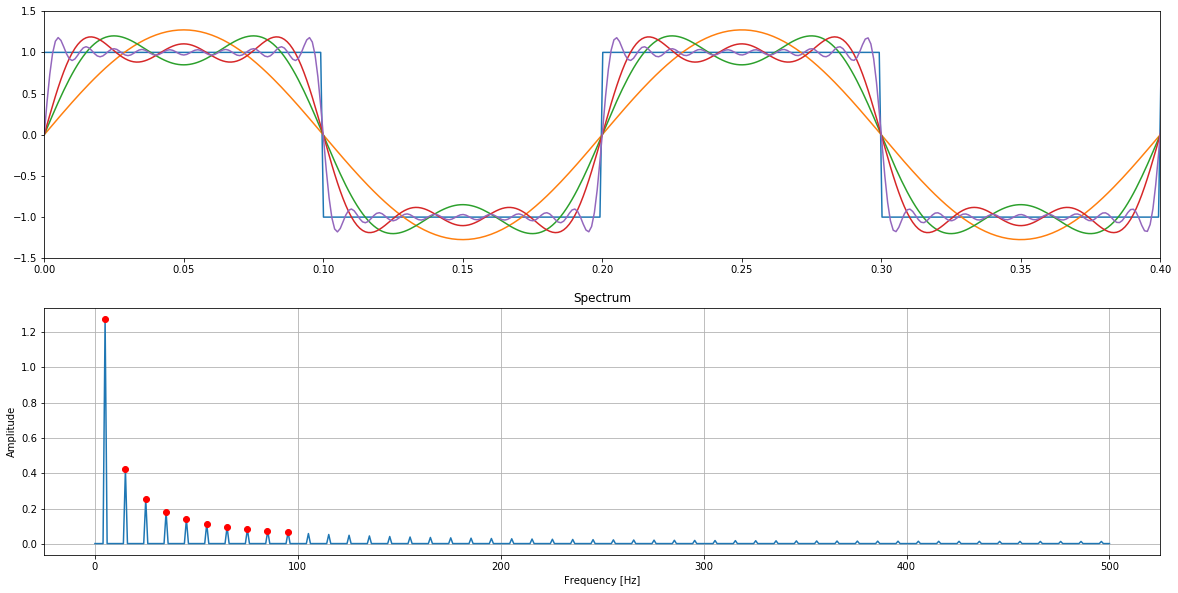

In [3]:
import numpy as np

from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt

N = 1000 # number of sample points
dt = 1. / 500 # sample spacing

frequency1 = 50.
frequency2 = 80.

t = np.linspace(0.0, N*dt, N)
y = np.sin(2*np.pi * frequency1 * t) + .5 * np.sin(2*np.pi * frequency2 * t)

yf = fft(y)
tf = np.linspace(.0, 1./(2.*dt), N/2)
spectrum = 2./N * np.abs(yf[0:N//2])

figure1 = plt.figure(1, (20, 10))
plt.plot(tf, spectrum, 'o-')
plt.grid()
for frequency in frequency1, frequency2:
    plt.axvline(x=frequency, color='red')
plt.title('Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

N = 1000 # number of sample points
dt = 1. / 1000 # sample spacing

frequency = 5.

t = np.linspace(.0, N*dt, N)
y = signal.square(2*np.pi*frequency*t)

figure2 = plt.figure(2, (20, 10))

plt.subplot(211)
plt.plot(t, y)
y_sum = None
for n in range(1, 20, 2):
    yn = 4/(np.pi*n)*np.sin((2*np.pi*n*frequency*t))
    if y_sum is None:
        y_sum = yn
    else:
        y_sum += yn
    if n in (1, 3, 5):
        plt.plot(t, y_sum)
plt.plot(t, y_sum)
plt.xlim(0, 2/frequency)
plt.ylim(-1.5, 1.5)

yf = fft(y)
tf = np.linspace(.0, 1./(2.*dt), N/2)
spectrum = 2./N * np.abs(yf[0:N//2])

plt.subplot(212)
plt.plot(tf, spectrum)
n = np.arange(1, 20, 2)
plt.plot(n*frequency, 4/(np.pi*n), 'o', color='red')
plt.grid()
plt.title('Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.show()

# 3.Diode二极管
---
## 3.1 Ringmodulator

## 3.2 Diode Characteristic Curve
### 3.2.1 二极管原理
![diode 原理图](./images/diode.svg)

### 3.2.2 仿真
we use the common high-speed diode 1N4148. The diode is driven by a variable voltage source through a limiting current resistance.
![circuit image](./images/diode-characteristic-curve-circuit.png)

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Unit import *
from PySpice.Physics.SemiConductor import ShockleyDiode

#要把pyspice里面的libraries目录复制到C:\Users\ldc\Anaconda3\envs\dev\lib里面
libraries_path = find_libraries()
print(libraries_path)
spice_library = SpiceLibrary(libraries_path)

circuit = Circuit('Diode Characteristic Curve')

circuit.include(spice_library['1N4148'])

circuit.V('input', 'in', circuit.gnd, 10@u_V) #添加一个电源
circuit.R(1, 'in', 'out', 1@u_Ω) # not required for simulation
circuit.X('D1', '1N4148', 'out', circuit.gnd)
print(circuit)
#

# Fixme: Xyce ???
#We simulate the circuit at these temperatures: 0, 25 and 100 °C.
temperatures = [0, 25, 100]@u_Degree
analyses = {}
for temperature in temperatures:
    simulator = circuit.simulator(temperature=temperature, nominal_temperature=temperature)
    analysis = simulator.dc(Vinput=slice(-2, 5, .01))
    analyses[float(temperature)] = analysis



2018-05-31 22:25:00,240 - PySpice.Spice.Netlist - Netlist.DEBUG - Element don't define a __pins__ attribute
2018-05-31 22:25:00,249 - PySpice.Spice.Netlist - Netlist.DEBUG - FixedPinElement don't define a __pins__ attribute
2018-05-31 22:25:00,252 - PySpice.Spice.Netlist - Netlist.DEBUG - SubCircuitElement don't define a __pins__ attribute
2018-05-31 22:25:00,256 - PySpice.Spice.Netlist - Netlist.DEBUG - Resistor don't define a __pins__ attribute
2018-05-31 22:25:00,259 - PySpice.Spice.Netlist - Netlist.DEBUG - SemiconductorResistor don't define a __pins__ attribute
2018-05-31 22:25:00,261 - PySpice.Spice.Netlist - Netlist.DEBUG - BehavioralResistor don't define a __pins__ attribute
2018-05-31 22:25:00,263 - PySpice.Spice.Netlist - Netlist.DEBUG - Capacitor don't define a __pins__ attribute
2018-05-31 22:25:00,266 - PySpice.Spice.Netlist - Netlist.DEBUG - SemiconductorCapacitor don't define a __pins__ attribute
2018-05-31 22:25:00,269 - PySpice.Spice.Netlist - Netlist.DEBUG - Behaviora

2018-05-31 22:25:00,728 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Execute command: destroy all
2018-05-31 22:25:00,761 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Simulation is done
2018-05-31 22:25:00,763 - PySpice.Spice.NgSpice.Simulation.NgSpiceSharedCircuitSimulator - Simulation.DEBUG - ['dc1', 'const']
2018-05-31 22:25:00,767 - PySpice.Spice.NgSpice.Simulation.NgSpiceSharedCircuitSimulator - Simulation.DEBUG - desk
.title Diode Characteristic Curve
.include C:\Users\ldc\Anaconda3\envs\dev\lib\libraries\diode\switching\1N4148.lib
Vinput in 0 10V
R1 in out 1Ohm
XD1 out 0 1N4148
.options TEMP = 25°C
.options TNOM = 25°C
.ic 
.dc Vinput -2 5 0.01
.end

2018-05-31 22:25:00,769 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Execute command: destroy all
2018-05-31 22:25:00,779 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.DEBUG - Simulation is done
2018-05-31 22:25:00,780 - PySpice.Spice.NgSpice.Simulation.NgSpiceSharedCircuitS

---
We plot the characteristic curve and compare it to the Shockley diode model:
$$
I_d=I_s\left( e^{\dfrac{V_d}{nV_T}} - 1\right), where \\
V_T=\dfrac{kT}{q}
$$
In order to scale the reverse biased region, we have to do some hack with Matplotlib.

In [2]:
silicon_forward_voltage_threshold = .7 #硅二极管的正向导通电压：0.7V

#from PySpice.Physics.SemiConductor import ShockleyDiode
shockley_diode = ShockleyDiode(Is=4e-9, degree=25)

#import matplotlib.ticker as ticker
#下面修正坐标的刻度，电流>0时以mA为单位，<0时以nA为单位
def two_scales_tick_formatter(value, position):
    if value >= 0:
        return '{} mA'.format(value)
    else:
        return '{} nA'.format(value/100)
formatter = ticker.FuncFormatter(two_scales_tick_formatter)

figure = plt.figure(1, (20, 10))

axe = plt.subplot(121)
axe.set_title('1N4148 Characteristic Curve ')
axe.set_xlabel('Voltage [V]')
axe.set_ylabel('Current')
axe.grid()
axe.set_xlim(-2, 2)
axe.axvspan(-2, 0, facecolor='green', alpha=.2)
axe.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=.1)
axe.axvspan(silicon_forward_voltage_threshold, 2, facecolor='blue', alpha=.2)
axe.set_ylim(-500, 750) # Fixme: round
axe.yaxis.set_major_formatter(formatter)
Vd = analyses[25].out
# compute scale for reverse and forward region
forward_region = Vd >= 0@u_V
reverse_region = np.invert(forward_region)
scale =  reverse_region*1e11 + forward_region*1e3
for temperature in temperatures:
    analysis = analyses[float(temperature)]
    axe.plot(Vd, - analysis.Vinput * scale)
axe.plot(Vd, shockley_diode.I(Vd) * scale, 'black')
axe.legend(['@ {} °C'.format(temperature)
            for temperature in temperatures] + ['Shockley Diode Model Is = 4 nA'],
           loc=(.02,.8))
axe.axvline(x=0, color='black')
axe.axhline(y=0, color='black')
axe.axvline(x=silicon_forward_voltage_threshold, color='red')
axe.text(-1, -100, 'Reverse Biased Region', ha='center', va='center')
axe.text( 1, -100, 'Forward Biased Region', ha='center', va='center')

2018-05-31 22:25:22,702 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'greater_equal'> is UNIT_MATCH_NO_OUT_CAST
2018-05-31 22:25:22,704 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2018-05-31 22:25:22,707 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'multiply'> is NEW_UNIT
2018-05-31 22:25:22,708 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2018-05-31 22:25:22,715 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2018-05-31 22:25:22,717 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'multiply'> is NEW_UNIT
2018-05-31 22:25:22,721 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2018-05-31 22:25:22,726 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2018-05-31 22:25:22,728 - Py

Now we compute and plot the static and dynamic resistance.
$$
\dfrac{dI_d}{dV_d}=\dfrac{1}{nV_T}(I_d+I_s) \\
r_d=\dfrac{dV_d}{dI_d}≈\dfrac{nV_T}{I_d}
$$

2018-05-31 22:29:56,091 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2018-05-31 22:29:56,093 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'true_divide'> is NEW_UNIT
2018-05-31 22:29:56,095 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2018-05-31 22:29:56,097 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2018-05-31 22:29:56,099 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2018-05-31 22:29:56,102 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'true_divide'> is NEW_UNIT
2018-05-31 22:29:56,105 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2018-05-31 22:29:56,110 - PySpice.Probe.WaveForm.WaveForm - Unit.INFO - Conversion for <ufunc 'add'> is UNIT_MATCH


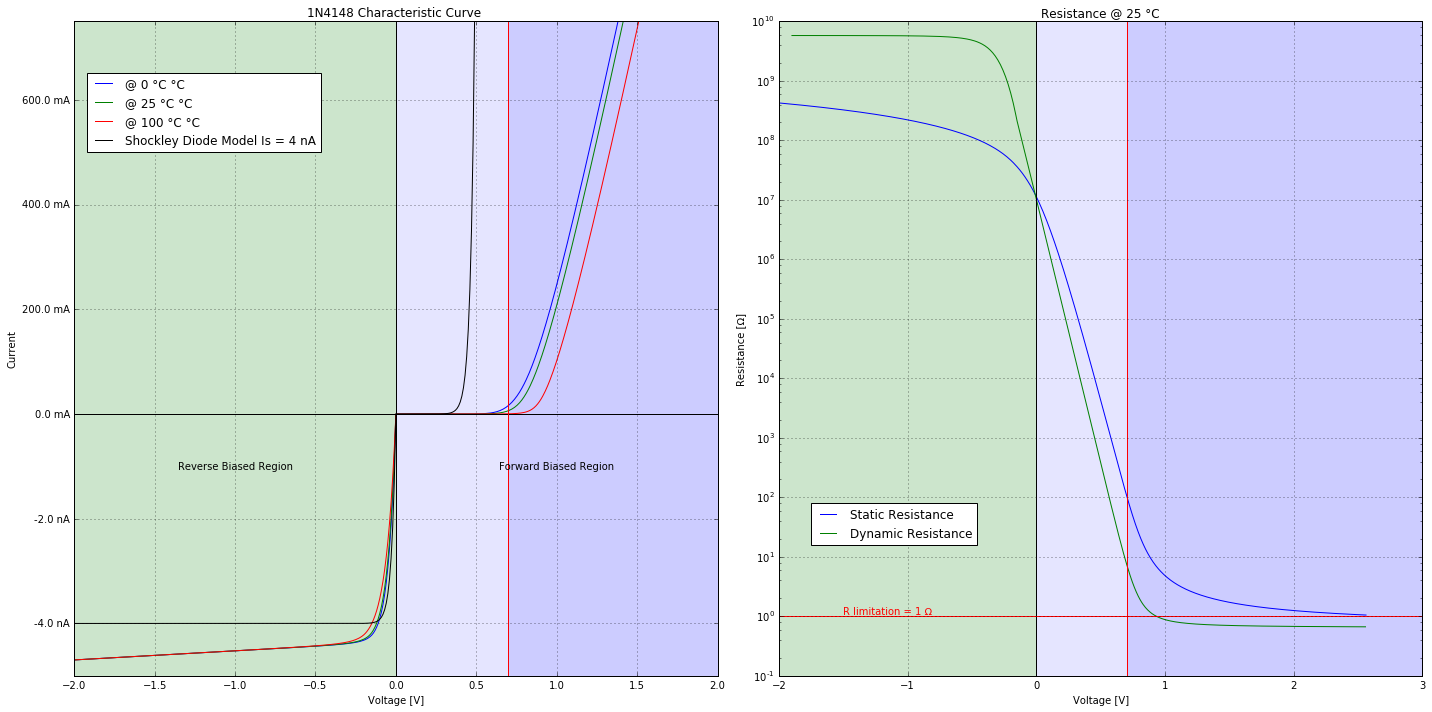

In [3]:
axe = plt.subplot(122)
axe.set_title('Resistance @ 25 °C')
axe.grid()
axe.set_xlim(-2, 3)
axe.axvspan(-2, 0, facecolor='green', alpha=.2)
axe.axvspan(0, silicon_forward_voltage_threshold, facecolor='blue', alpha=.1)
axe.axvspan(silicon_forward_voltage_threshold, 3, facecolor='blue', alpha=.2)
analysis = analyses[25]
static_resistance = -analysis.out / analysis.Vinput
dynamic_resistance = np.diff(-analysis.out) / np.diff(analysis.Vinput)
axe.semilogy(analysis.out, static_resistance, basey=10)
axe.semilogy(analysis.out[10:-1], dynamic_resistance[10:], basey=10)
axe.axvline(x=0, color='black')
axe.axvline(x=silicon_forward_voltage_threshold, color='red')
axe.axhline(y=1, color='red')
axe.text(-1.5, 1.1, 'R limitation = 1 Ω', color='red')
axe.legend(['{} Resistance'.format(x) for x in ('Static', 'Dynamic')], loc=(.05,.2))
axe.set_xlabel('Voltage [V]')
axe.set_ylabel('Resistance [Ω]')

plt.tight_layout()
plt.show()

## 3.3 Diode Recovery Time
---
This example illustrates the diode recovery time and the capacitive behaviour of a PN junction.
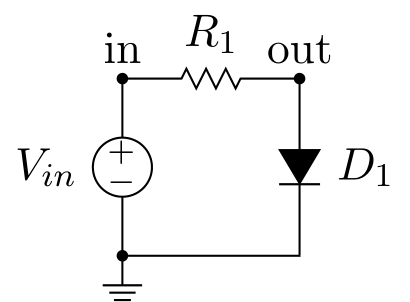
Since this circuit is equivalent to a voltage divider, we can write the following relation :
$$
V_{out}=\dfrac{Z_d}{R_1+Z_d}V_{in}
$$
where $Z_d$ is the diode impedance(阻抗).

C:\Users\ldc\Anaconda3\envs\dev\lib\libraries
Quiescent Point 561.0 mV 0.3 mA
Quiescent Point 574.9 mV 0.4 mA
Quiescent Point 586.6 mV 0.5 mA


C:\Users\ldc\Anaconda3\envs\dev\lib\site-packages\PySpice\Unit\Unit.py:1879: ComplexWarning: Casting complex values to real discards the imaginary part
  super(UnitValues, self).__setitem__(_slice, value)


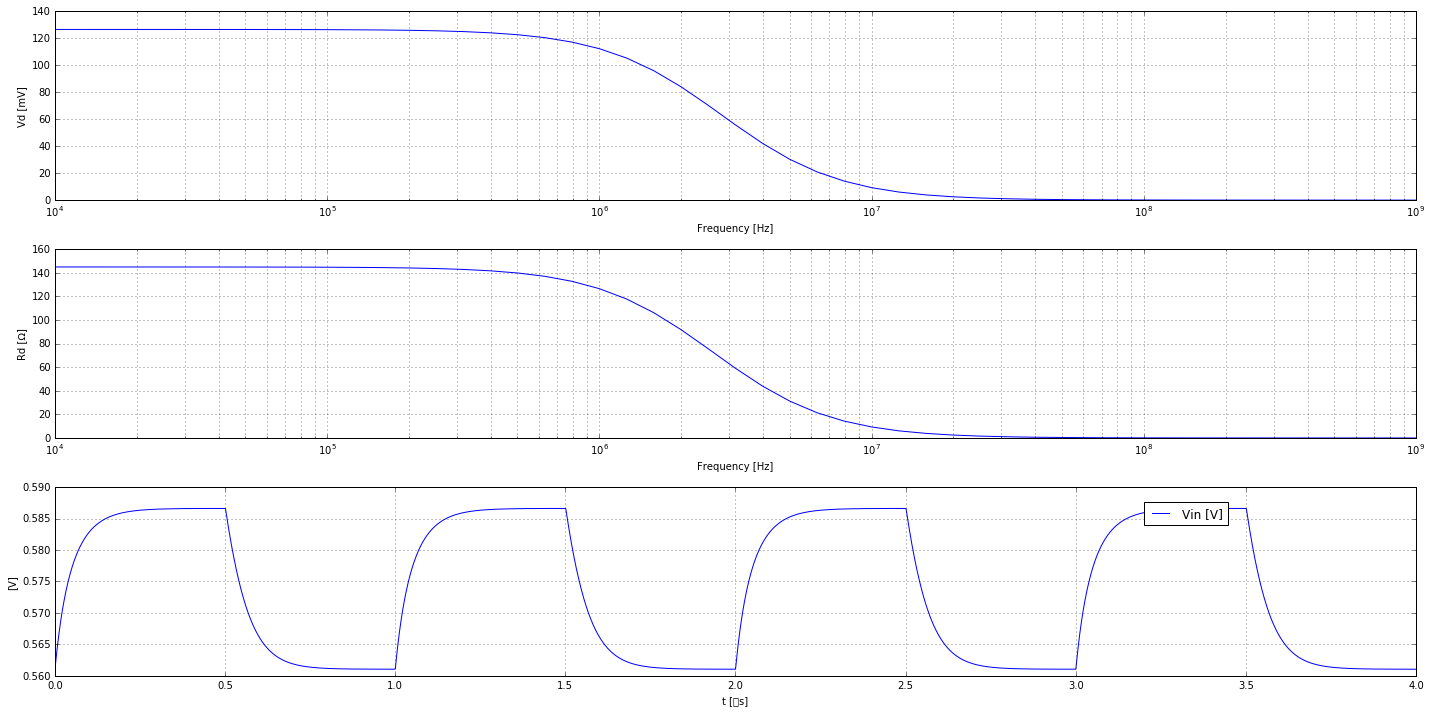

In [8]:
import os

import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)
print(libraries_path)
print(spice_library)

dc_offset = 1@u_V
ac_amplitude = 100@u_mV

circuit = Circuit('Diode')
circuit.include(spice_library['BAV21'])
# Fixme: Xyce: Device model BAV21: 
# Illegal parameter(s) given for level 1 diode: IKF
source = circuit.V('input', 'in', circuit.gnd, dc_offset)
circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='BAV21')

quiescent_points = []  #静止工作点
for voltage in (dc_offset - ac_amplitude, 
                dc_offset, 
                dc_offset + ac_amplitude):
    source.dc_value = voltage
    simulator = circuit.simulator(temperature=25, 
                                  nominal_temperature=25)
    analysis = simulator.operating_point()
    # Fixme: handle unit
    quiescent_voltage = float(analysis.out)
    quiescent_current = - float(analysis.Vinput)
    quiescent_points.append(dict(voltage=voltage,
                                 quiescent_voltage=quiescent_voltage,
                                 quiescent_current=quiescent_current))
    print("Quiescent Point {:.1f} mV {:.1f} mA".format(
        quiescent_voltage*1e3, quiescent_current*1e3))

dynamic_resistance = ((quiescent_points[ 0]['quiescent_voltage'] -
                       quiescent_points[-1]['quiescent_voltage'])
                      /
                      (quiescent_points[ 0]['quiescent_current'] -
                       quiescent_points[-1]['quiescent_current']))

#把信号源换为正弦信号，改为ac分析（交流信号频率分析）
circuit = Circuit('Diode')
circuit.include(spice_library['BAV21'])
circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd,
                   dc_offset=dc_offset, offset=dc_offset,
                   amplitude=ac_amplitude)
R = circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='BAV21')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=10@u_kHz, 
                        stop_frequency=1@u_GHz, 
                        number_of_points=10,  variation='dec')
#variation（等级或数量的）变化，变动，变更

figure = plt.figure(1, (20, 10))

axe = plt.subplot(311)
# Fixme: handle unit in plot (scale and legend)
axe.semilogx(analysis.frequency, np.absolute(analysis.out)*1e3)
axe.grid(True)
axe.grid(True, which='minor')
axe.set_xlabel("Frequency [Hz]")
axe.set_ylabel("Vd [mV]")

axe = plt.subplot(312)
current = (analysis['in'] - analysis.out) / float(R.resistance)
axe.semilogx(analysis.frequency, np.absolute(analysis.out/current))
axe.grid(True)
axe.grid(True, which='minor')
axe.set_xlabel("Frequency [Hz]")
axe.set_ylabel('Rd [Ω]')

#改为脉冲信号，进行瞬态分析
frequency = 1@u_MHz

circuit = Circuit('Diode')
circuit.include(spice_library['BAV21'])
# source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd,
#                             dc_offset=dc_offset, offset=dc_offset,
#                             amplitude=ac_amplitude,
#                             frequency=frequency)
source = circuit.PulseVoltageSource('input', 'in', circuit.gnd,
                       initial_value=dc_offset-ac_amplitude, 
                       pulsed_value=dc_offset+ac_amplitude,
                       pulse_width=frequency.period/2, 
                       period=frequency.period)
circuit.R(1, 'in', 'out', 1@u_kΩ)
circuit.D('1', 'out', circuit.gnd, model='BAV21')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/1e3, 
                               end_time=source.period*4)

axe = plt.subplot(313)
# Fixme: axis, x scale
# plot(analysis['in'] - dc_offset + 
#       quiescent_points[0]['quiescent_voltage'], axis=axe)
# plot(analysis.out, axis=axe)
# abscissa横坐标
axe.plot(analysis.out.abscissa*1e6, analysis.out)
axe.legend(('Vin [V]', 'Vout [V]'), loc=(.8,.8))
axe.grid()
axe.set_xlabel('t [μs]')
axe.set_ylabel('[V]')
# axe.set_ylim(.5, 1 + ac_amplitude + .1)
plt.tight_layout()
plt.show()

## 3.4 Rectification整流
---
### 3.4.1 半波整流
---
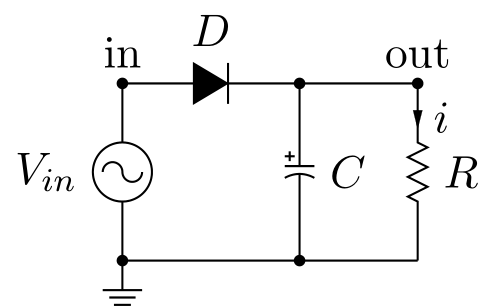

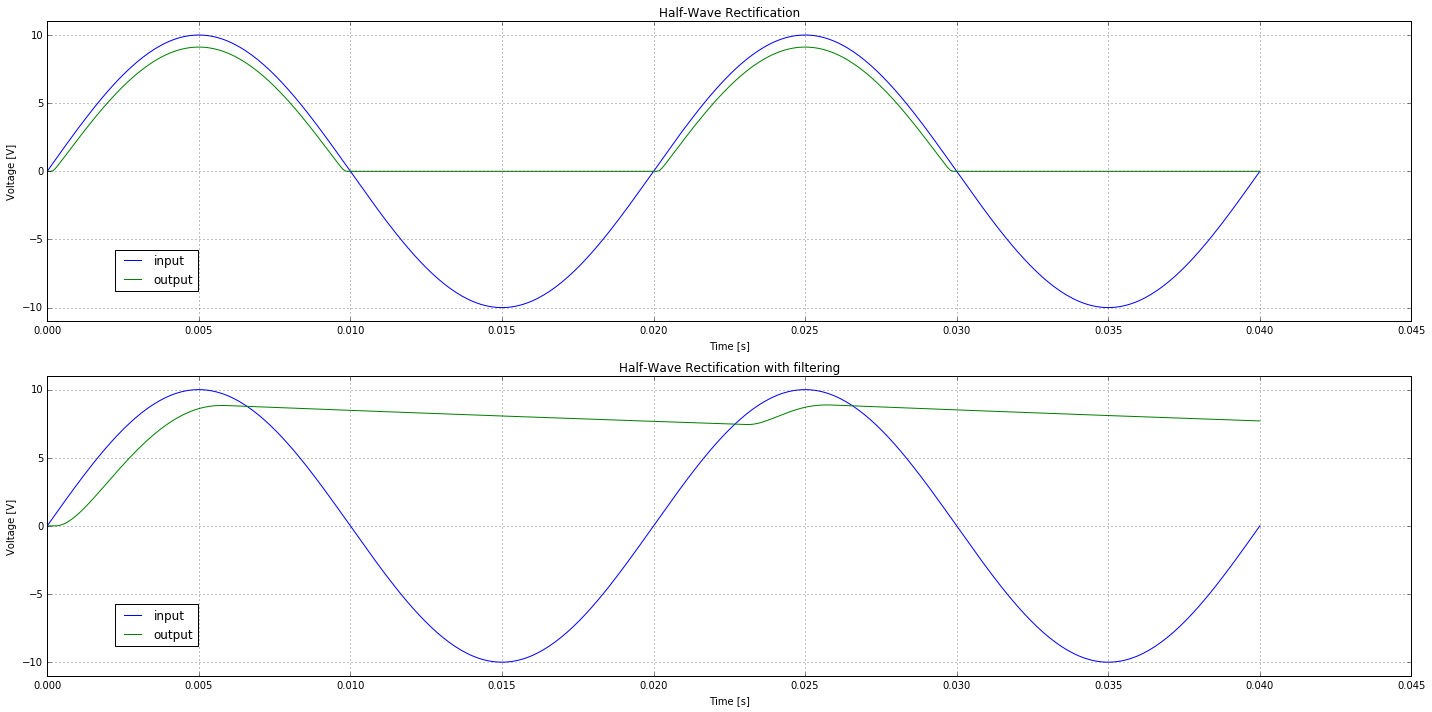

In [9]:
import os

import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


figure1 = plt.figure(1, (20, 10))

#下面是整流
circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', 
                                         circuit.gnd, 
                                         amplitude=10@u_V, 
                                         frequency=50@u_Hz)
circuit.X('D1', '1N4148', 'in', 'output')
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, 
                               end_time=source.period*2)

axe = plt.subplot(211)
plt.title('Half-Wave Rectification')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['in'], axis=axe)
plot(analysis.output, axis=axe)
plt.legend(('input', 'output'), loc=(.05,.1))
plt.ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

#下面是加入滤波
circuit.C('1', 'output', circuit.gnd, 1@u_mF)

simulator = circuit.simulator(temperature=25, 
                              nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, 
                               end_time=source.period*2)

axe = plt.subplot(212)
plt.title('Half-Wave Rectification with filtering')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['in'], axis=axe)
plot(analysis.output, axis=axe)
plt.legend(('input', 'output'), loc=(.05,.1))
plt.ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()
plt.show()

### 3.4.2 全波整流
---
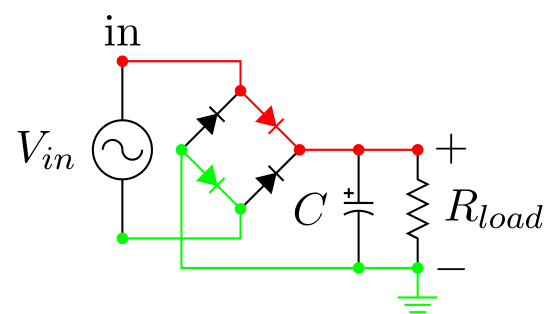

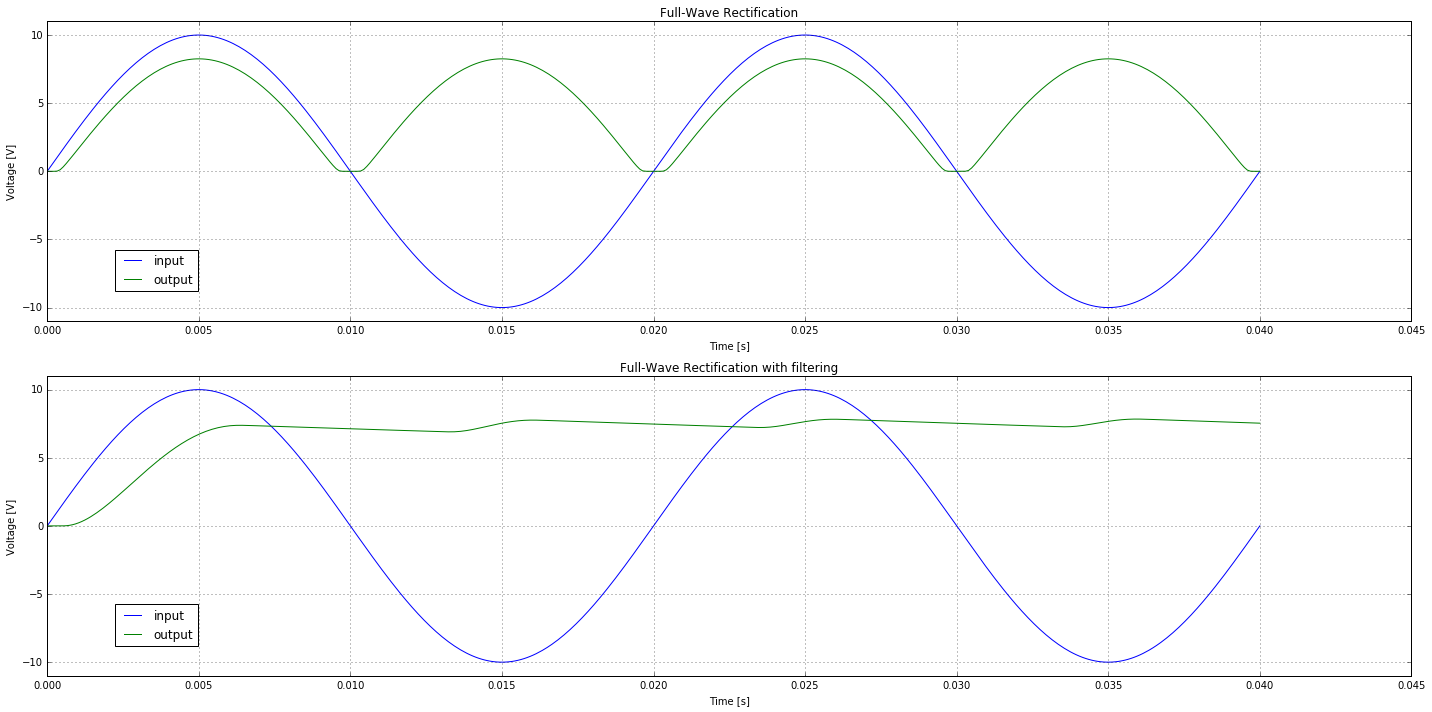

In [10]:
import os

import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


figure1 = plt.figure(1, (20, 10))

circuit = Circuit('full-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', 
                                         circuit.gnd, 
                                         amplitude=10, frequency=50)
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.R('load', 'output_plus', 'output_minus', 100@u_Ω)
circuit.X('D2', '1N4148', 'output_minus', circuit.gnd)
circuit.X('D3', '1N4148', circuit.gnd, 'output_plus')
circuit.X('D4', '1N4148', 'output_minus', 'in')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, 
                               end_time=source.period*2)

axe = plt.subplot(211)
plt.title('Full-Wave Rectification')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['in'], axis=axe)
plot(analysis.output_plus - analysis.output_minus, axis=axe)
plt.legend(('input', 'output'), loc=(.05,.1))
plt.ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

#加入滤波
circuit.C('1', 'output_plus', 'output_minus', 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, 
                               end_time=source.period*2)

axe = plt.subplot(212)
plt.title('Full-Wave Rectification with filtering')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plot(analysis['in'], axis=axe)
plot(analysis.output_plus - analysis.output_minus, axis=axe)
plt.legend(('input', 'output'), loc=(.05,.1))
plt.ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()
plt.show()